In [1]:
# ensemble model:

import pandas as pd
import numpy as np
import random

In [2]:
df = pd.read_csv(r'./data/preprocess.csv')

df.head()

,IDX,mean_ndvi_2022-06-02,mean_ndvi_2022-06-17,mean_ndvi_2022-06-07,mean_ndvi_2022-06-22,mean_ndvi_2022-06-12,mean_ndre_2022-06-02,mean_ndre_2022-06-17,mean_ndre_2022-06-07,mean_ndre_2022-06-12,IDX.1,sum_ndvi_2022-06-02,sum_ndvi_2022-06-17,sum_ndvi_2022-06-07,sum_ndvi_2022-06-22,sum_ndvi_2022-06-12,sum_ndre_2022-06-02,sum_ndre_2022-06-17,sum_ndre_2022-06-07,sum_ndre_2022-06-12
0,3942,0.007476,0.212770,0.180844,0.038478,0.219896,-0.017073,0.151714,0.123746,0.153333,3942,0.530825,15.106694,12.839933,2.731913,15.612608,-1.212181,10.771678,8.785966,10.886635
1,4053,0.008709,0.202058,0.165046,-0.019584,0.198812,-0.007738,0.134886,0.106043,0.128798,4053,1.689533,39.199349,32.018860,-3.799293,38.569600,-1.501124,26.167940,20.572346,24.986805
2,4196,0.204576,0.192939,0.156745,-0.011448,0.186642,0.226347,0.128658,0.095656,0.117090,4196,19.639275,18.522111,15.047543,-1.099016,17.917662,21.729303,12.351145,9.183014,11.240659
3,4422,-0.001838,0.198717,0.181343,-0.002894,0.215428,-0.036878,0.132829,0.113879,0.136089,4422,-0.104746,11.326846,10.336535,-0.164956,12.279409,-2.102046,7.571269,6.491099,7.757051
4,4424,-0.046762,0.205482,0.185708,-0.005377,0.218237,-0.094255,0.145178,0.124556,0.148208,4424,-1.730197,7.602816,6.871180,-0.198932,8.074769,-3.487440,5.371600,4.608560,5.483689


In [3]:
target = pd.read_csv('./data/target_PROD.csv')

In [4]:
X = pd.read_csv(r'./preprocess.csv')

y = target['PROD']

### BEST_MODELS / MLP / RF / SVR

In [5]:
# MLP

from sklearn.neural_network import MLPRegressor

# utilizamos los mejores parámetros observados en pts anteriores:

mlp = MLPRegressor(

    **{'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (120, 80, 40), 'learning_rate': 'adaptive', 'max_iter': 50, 'solver': 'sgd'}
)

In [6]:
# RANDOM FOREST

from sklearn.ensemble import RandomForestRegressor

# utilizamos los mejores parámetros observados en pts anteriores:

rf  = RandomForestRegressor(
    
    **{'max_depth': 3,
    'max_features': 'sqrt',
    'n_estimators': 10,
    'random_state': 42}
)

In [7]:
from sklearn.svm import SVR

svr = SVR(**{'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'})

### VOTING

In [8]:
from sklearn.ensemble import VotingRegressor#create a dictionary of our models

estimators=[
    ('knn', mlp), 
    ('rf', rf), 
    ('svr', svr)
]#create our voting classifier, inputting our models

ensemble = VotingRegressor(estimators)

# modelo ensemble creado:

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
SEED = 42

X_train, X_test, y_train, y_test= train_test_split(
    
    X,y,
    train_size   = 0.8,
    random_state = SEED,
)

In [16]:
mlp.fit(X_train, y_train)
rf.fit(X_train, y_train)
svr.fit(X_train, y_train)

c:\Users\Alberto-PC\Desktop\venv-data-science\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


SVR(gamma=0.1)

In [17]:
ensemble.fit(X_train, y_train)


c:\Users\Alberto-PC\Desktop\venv-data-science\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


VotingRegressor(estimators=[('knn',
                             MLPRegressor(activation='tanh', alpha=0.05,
                                          hidden_layer_sizes=(120, 80, 40),
                                          learning_rate='adaptive', max_iter=50,
                                          solver='sgd')),
                            ('rf',
                             RandomForestRegressor(max_depth=3,
                                                   max_features='sqrt',
                                                   n_estimators=10,
                                                   random_state=42)),
                            ('svr', SVR(gamma=0.1))])

In [18]:
y_pred = ensemble.predict(X_test)

print(y_pred)

[4614.6760087  3915.04419461 4992.21470766 4147.76213992 5170.15572819]


In [19]:
from sklearn import metrics

# test metrics:

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error (MAE): 7821.82944418154
Mean Squared Error (MSE): 163090467.43978292
Root Mean Squared Error (RMSE): 12770.687821718253


In [20]:
xt = X[:20]

pred1 = mlp.predict(xt)
pred2 = rf.predict(xt)
pred3 = svr.predict(xt)
pred4 = ensemble.predict(xt)

In [22]:
import matplotlib.pyplot as plt

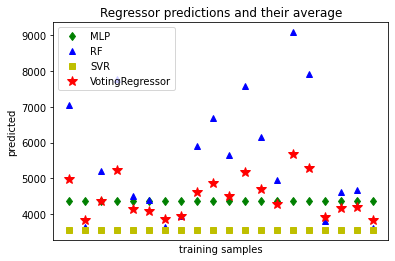

In [23]:
plt.figure()
plt.plot(pred1, "gd", label="MLP")
plt.plot(pred2, "b^", label="RF")
plt.plot(pred3, "ys", label="SVR")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()

# obtenemos un plot de predicciones para las 20 primeras filas del df. 
# comparamos el ensemble con cada modelo individual.

### STACK_MODEL

In [ ]:
# hacemos un grid search sobre un gran número de hiperparámetros.

In [24]:
# STACK

from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor

estimators = [('forest', rf),
              ('mlp', mlp),
              ('svr', svr)]

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)

GBR=GradientBoostingRegressor()

search_grid={
    'n_estimators':[500,1000,2000],
    'learning_rate':[.001,0.01,.1],
    'max_depth':[1,2,4],
    'subsample':[.5,.75,1],
    'random_state':[1]
}

search=GridSearchCV(
    
    estimator=GBR,
    param_grid=search_grid,
    scoring='neg_mean_squared_error',
    n_jobs=1,cv=crossvalidation
)

search.fit(X_train, y_train)
params = search.best_params_

final_estimator = GradientBoostingRegressor(**search.best_params_)

reg = StackingRegressor(

    estimators=estimators,
    final_estimator=GBR)

In [28]:
# mejores parámetros encontrados

params

{'learning_rate': 0.001,
 'max_depth': 1,
 'n_estimators': 500,
 'random_state': 1,
 'subsample': 0.5}

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print(y_pred)

[10448.93974662  8309.44475372  3857.99358598  3232.45485466
  3676.99287159]


In [32]:
from sklearn import metrics

# test metrics:

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error (MAE): 8038.012738974883
Mean Squared Error (MSE): 162602504.08348495
Root Mean Squared Error (RMSE): 12751.56869108601
